In [119]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
from sympy.plotting import plot3d

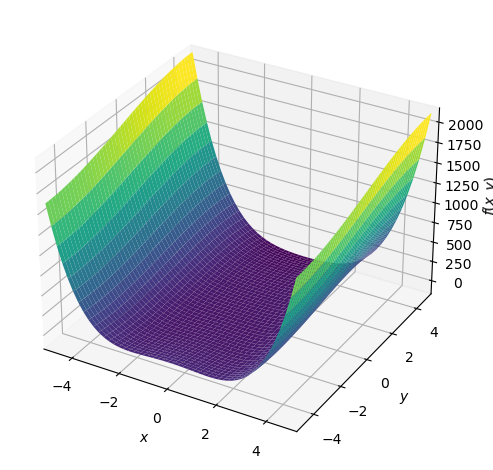

In [120]:
# symbolic handling
x, y = sympy.symbols('x y')
# the objective function
f = 3*x**4 + 3* x**2 * y - y**3
# plot the function to see how it looks like
plot3d(f, (x, -5, 5), (y, -5, 5))

In [121]:
# Find the critical points
foc1 = sympy.diff(f, x) #first order wrt x
foc2 = sympy.diff(f, y) #first order wrt y
# find critical points by solving the first order conditions (by default, it solves so that the function is zero)
critical_points = sympy.solve([foc1, foc2], [x, y])
critical_points

[(-1/2, -1/2), (0, 0), (1/2, -1/2)]

In [122]:
# Find the optimium of the function
hess = sympy.hessian(f, [x, y])
hess

Matrix([
[36*x**2 + 6*y,  6*x],
[          6*x, -6*y]])

In [123]:
# test hessian matrix at critical points
h1 = hess.subs({x: critical_points[0][0], y: critical_points[0][1]})
# test if h1 is positive definite or negative definite
h1.eigenvals()

{9/2 - 3*sqrt(5)/2: 1, 3*sqrt(5)/2 + 9/2: 1}

In [124]:
# definiteness of hessian matrix
def hess_def_test(hessian):
    hess_eigenvals = hessian.eigenvals()
    if all([i >= 0 for i in hess_eigenvals]):
        print('Positive definite')
    elif all([i <= 0 for i in hess_eigenvals]):
        print('Negative definite')
    else:
        print('Indefinite')

hess_def_test(h1)

Positive definite


In [125]:
def objective_f(x, y):
    return 3*x**4 + 3* x**2 * y - y**3



In [126]:
import sympy
# input variables
x,y,z = sympy.symbols("x y z")
# system of equations
equations = [
    sympy.Eq(x + 2*y + z,  4),
    sympy.Eq(x - y + z, 5),
    sympy.Eq(2*x + 3*y - z, 1)
]
# solve and store results
res = sympy.solve(equations)
res

{x: 20/9, y: -1/3, z: 22/9}

In [127]:
x, y = sympy.symbols('x y', real=True)
# objective function
f = x**2 * y 
# constraint
h = 2 * (x**2) + y**2 - 3

# define the Lagrangian multiplier
l = sympy.symbols('l', real=True)
# The Lagrangian is 
L = f - l * h

# The gradient of L is 
gradL = [sympy.diff(L, var) for var in [x, y, l]]
gradL


[-4*l*x + 2*x*y, -2*l*y + x**2, -2*x**2 - y**2 + 3]

In [128]:
# solve the gradient of L 
stationary = sympy.solve(gradL)
stationary

[{l: -1/2, x: -1, y: -1},
 {l: -1/2, x: 1, y: -1},
 {l: 0, x: 0, y: -sqrt(3)},
 {l: 0, x: 0, y: sqrt(3)},
 {l: 1/2, x: -1, y: 1},
 {l: 1/2, x: 1, y: 1}]

In [129]:
# make the bordered hessian matrix
## the jacobian of the constraint h wrt to x and y
jac_h = [sympy.diff(h, var) for var in [x, y]]
## the hessian of the Lagrangian
hess = sympy.hessian(L, [x, y])
## the transpose of jac_h
jac_hT = sympy.Matrix(jac_h).T
# the 3 by 3 bordered hessian matrix 
hess_bordered = sympy.Matrix(
    [ [0, jac_h[0], jac_h[1]],
        [jac_h[0], hess[0,0], hess[0,1]],
        [jac_h[1], hess[1,0], hess[1,1]]
    ]
)
hess_bordered

Matrix([
[  0,        4*x,  2*y],
[4*x, -4*l + 2*y,  2*x],
[2*y,        2*x, -2*l]])

In [130]:
stationary

[{l: -1/2, x: -1, y: -1},
 {l: -1/2, x: 1, y: -1},
 {l: 0, x: 0, y: -sqrt(3)},
 {l: 0, x: 0, y: sqrt(3)},
 {l: 1/2, x: -1, y: 1},
 {l: 1/2, x: 1, y: 1}]

In [133]:
# extract the values of l, x, y from the solution
n = 0
l_val = stationary[n][l]
x_val = stationary[n][x]
y_val = stationary[n][y]
print(l_val, x_val, y_val)
# test hessian matrix at critical points
hn = hess_bordered.subs({x: x_val, y: y_val, l: l_val})
# find eigenvalues of h1 
hn


-1/2 -1 -1


Matrix([
[ 0, -4, -2],
[-4,  0, -2],
[-2, -2,  1]])

In [134]:
sympy.det(hn)

-48